In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('3campain.csv')

In [3]:
data

,Campain,Sell
0,A,12.6
1,A,12.0
2,A,11.8
3,A,11.9
4,A,13.0
5,A,12.5
6,A,14.0
7,B,10.0
8,B,10.2
9,B,10.0


In [4]:
data['Mean'] = data['Sell'].mean()

In [5]:
sum_sq = sum((data['Sell'] - data['Mean']) **2 )
sum_sq

43.132380952380956

In [6]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [7]:
result = ols('Sell ~ Campain', data= data).fit()

In [8]:
sm.stats.anova_lm(result)

,df,sum_sq,mean_sq,F,PR(>F)
Campain,2.0,3.606905,1.803452,0.821297,0.455683
Residual,18.0,39.525476,2.195860,NaN,NaN


In [9]:
gMean = data.groupby('Campain').mean()[['Sell']]

In [10]:
gMean = gMean.rename(columns={'Sell': 'gMean'})

In [11]:
data = data.merge(gMean, left_on= 'Campain', right_index= True)

In [12]:
data

,Campain,Sell,Mean,gMean
0,A,12.6,11.980952,12.542857
1,A,12.0,11.980952,12.542857
2,A,11.8,11.980952,12.542857
3,A,11.9,11.980952,12.542857
4,A,13.0,11.980952,12.542857
5,A,12.5,11.980952,12.542857
6,A,14.0,11.980952,12.542857
7,B,10.0,11.980952,11.533333
8,B,10.2,11.980952,11.533333
9,B,10.0,11.980952,11.533333


In [13]:
ss_r = sum((data['Sell'] - data['gMean']) ** 2)

In [14]:
ss_r

39.52547619047619

In [16]:
ss_e = sum((data['Mean'] - data['gMean']) ** 2 )
ss_e

3.6069047619047634

In [19]:
ms_r = ss_r / 18 
ms_r

2.1958597883597886

In [21]:
ms_e = ss_e / 2
ms_e

1.8034523809523817

In [25]:
f = ms_e / ms_r
f

0.8212966923081559

In [26]:
import scipy as st

In [33]:
d = st.stats.f.rvs(2, 18, size= 1000)

In [28]:
import matplotlib.pyplot as plt

(array([85., 97., 61., 77., 48., 57., 58., 42., 30., 46., 26., 27., 24.,
        24., 28., 25., 12., 19., 16., 15., 17., 12.,  6., 15.,  8., 14.,
         5.,  5.,  7.,  4., 10.,  9.,  4.,  8.,  8.,  3.,  2.,  0.,  2.,
         4.,  2.,  1.,  0.,  3.,  1.,  5.,  1.,  0.,  2.,  3.,  3.,  1.,
         1.,  1.,  0.,  0.,  3.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  1.,  0.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([8.01256398e-04, 9.97511071e-02, 1.98700958e-01, 2.97650808e-01,
        3.96600659e-01, 4.95550510e-01, 5.94500360e-01, 6.93450211e-01,
        7.92400062e-01, 8.91349912e-01, 9.90299763e-01, 1.08924961e+00,
        1.18819946e+00, 1.28714931e+00, 1.38609917e+00, 1.48504902e+00,
        1.58399887e+00, 1.68294872e+00, 1.78189857e+00, 1.88084842e+00,
        1.97979827e+00, 2.07874812e+00, 2.17769797e+00, 2.27664782e+00,
  

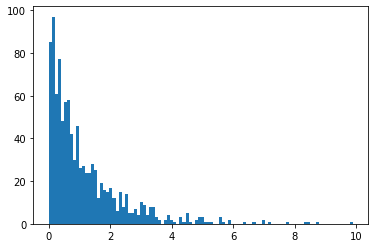

In [34]:
plt.hist(d, bins= 100)